In [1]:
#pip install wget
#!wget --no-check-certificate \
    #https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    #-O ./cats_and_dogs_filtered.zip
#!pip install matplotlib
#!pip install tensorflow

In [2]:
import numpy as np
import random
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

In [3]:
'''
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()'''

"\nlocal_zip = './cats_and_dogs_filtered.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('./')\nzip_ref.close()"

In [4]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio con los gatos de entrenamiento
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio con los perros de entrenamiento
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con los gatos de validacion
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directorio con los perros de entrenamiento
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [5]:
print('Cantidad de gatos de entrenamiento:', len(os.listdir(train_cats_dir)))
print('Cantidad de perros de entrenamiento:', len(os.listdir(train_dogs_dir)))
print('Cantidad de gatos de validacion:', len(os.listdir(validation_cats_dir)))
print('Cantidad de perros de validacion:', len(os.listdir(validation_dogs_dir)))

Cantidad de gatos de entrenamiento: 1000
Cantidad de perros de entrenamiento: 1000
Cantidad de gatos de validacion: 500
Cantidad de perros de validacion: 500


In [6]:
#Parametros
nFilas = 4
nColumnas = 4

# Indice para ver las imagenes
pic_index = 0

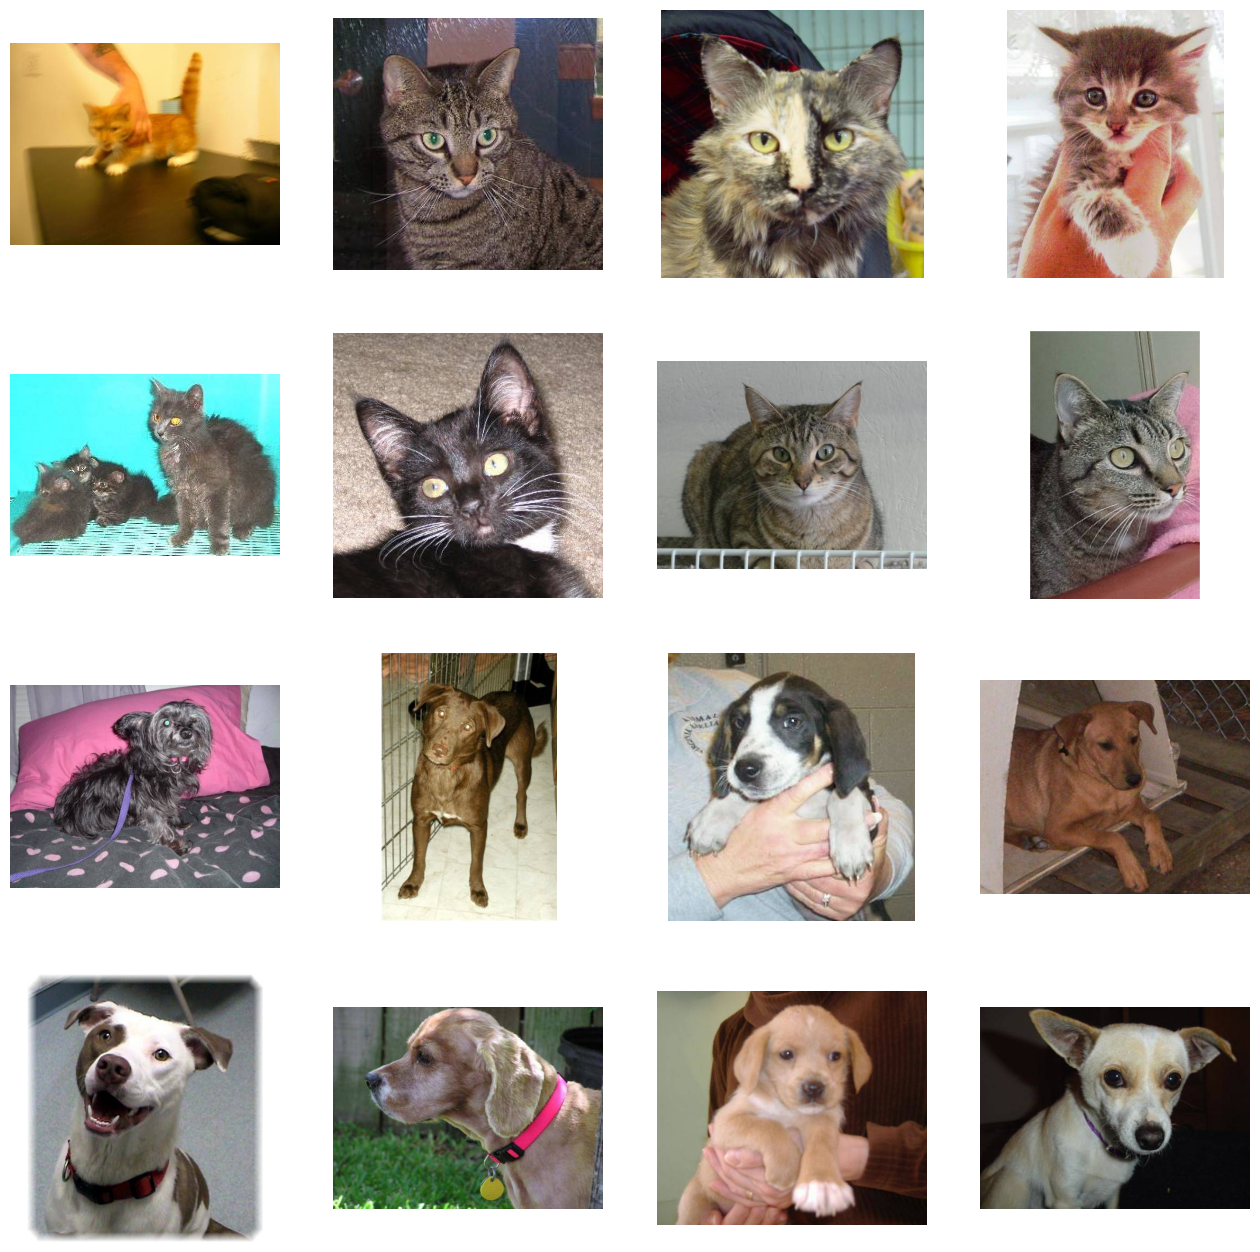

In [7]:
# Se establece el tamaño del fig y la cantidad de imagenes a mostrar
fig = plt.gcf()
fig.set_size_inches(nFilas * 4, nColumnas * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  
  sp = plt.subplot(nFilas, nColumnas, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)



# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

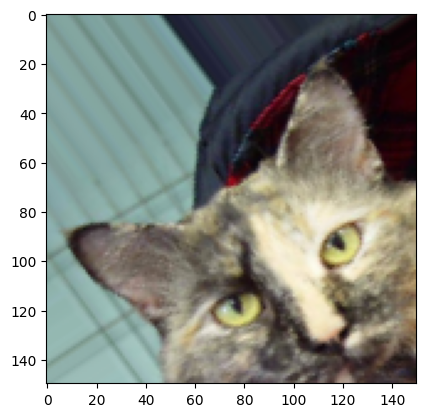

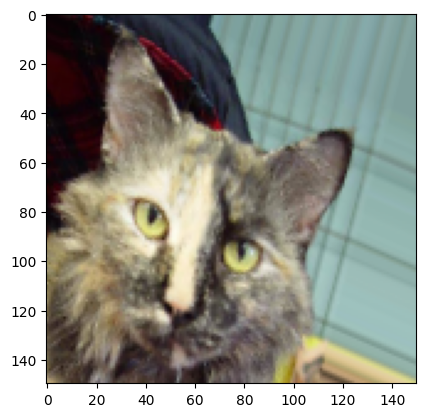

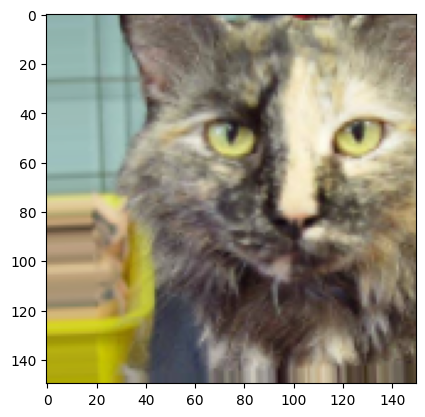

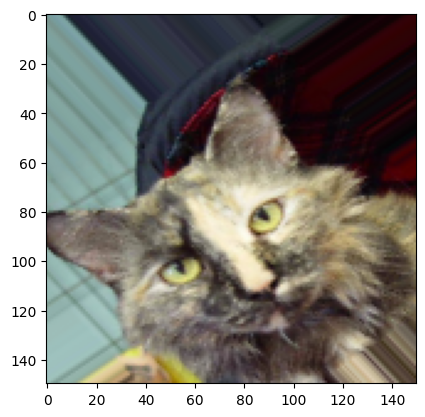

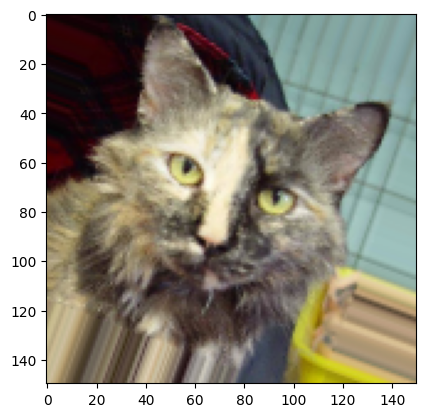

In [10]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


img_path = os.path.join(train_cats_dir, train_cat_fnames[2])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [11]:

# All images will be rescaled by 1./255
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


val_datagen = ImageDataGenerator(rescale=1./255)



# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<h1>TRAINING

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=120,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps ------------100
      verbose=2)

Epoch 1/120
100/100 - 68s - loss: 0.7507 - acc: 0.5400 - val_loss: 0.6838 - val_acc: 0.5770 - 68s/epoch - 677ms/step
Epoch 2/120
100/100 - 54s - loss: 0.6845 - acc: 0.5495 - val_loss: 0.6655 - val_acc: 0.5750 - 54s/epoch - 542ms/step
Epoch 3/120
100/100 - 39s - loss: 0.6636 - acc: 0.5965 - val_loss: 0.6379 - val_acc: 0.6180 - 39s/epoch - 394ms/step
Epoch 4/120
100/100 - 44s - loss: 0.6445 - acc: 0.6225 - val_loss: 0.6134 - val_acc: 0.6580 - 44s/epoch - 437ms/step
Epoch 5/120
100/100 - 44s - loss: 0.6172 - acc: 0.6440 - val_loss: 0.6255 - val_acc: 0.6280 - 44s/epoch - 440ms/step
Epoch 6/120
100/100 - 47s - loss: 0.6213 - acc: 0.6500 - val_loss: 0.5656 - val_acc: 0.6990 - 47s/epoch - 472ms/step
Epoch 7/120
100/100 - 46s - loss: 0.6020 - acc: 0.6650 - val_loss: 0.5600 - val_acc: 0.7040 - 46s/epoch - 457ms/step
Epoch 8/120
100/100 - 61s - loss: 0.6011 - acc: 0.6720 - val_loss: 0.5588 - val_acc: 0.7060 - 61s/epoch - 614ms/step
Epoch 9/120
100/100 - 54s - loss: 0.5955 - acc: 0.6745 - val_los

1/1 [==============================] - 0s 274ms/step


C:\Users\danie\AppData\Local\Temp\ipykernel_15704\1727612512.py:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


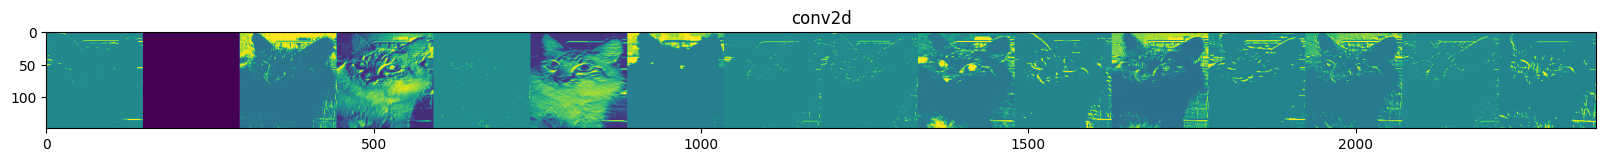

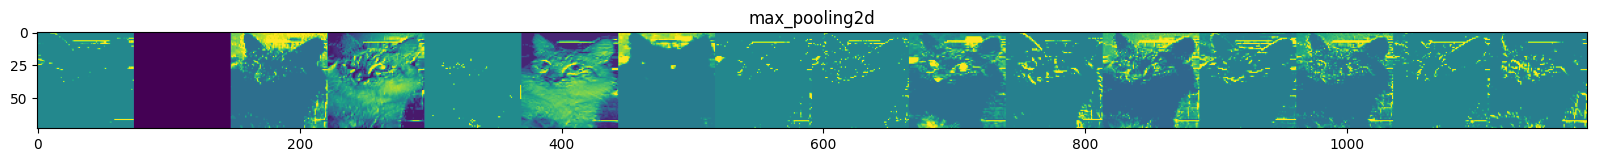

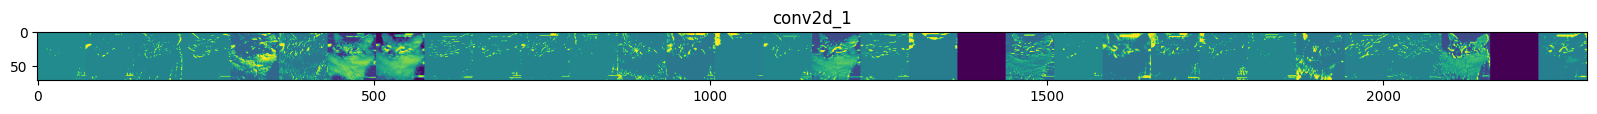

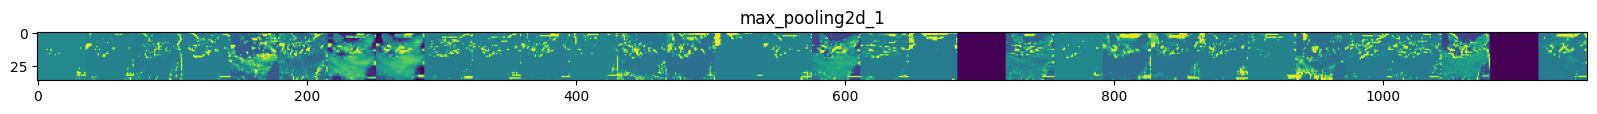

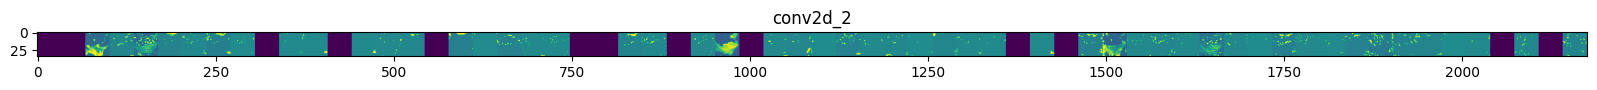

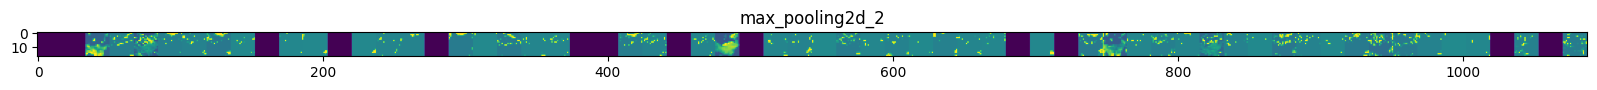

In [13]:

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

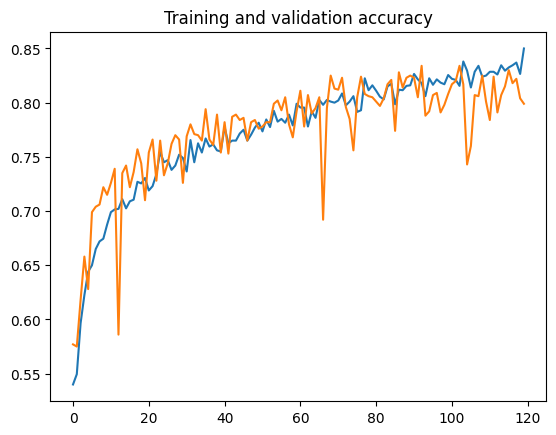

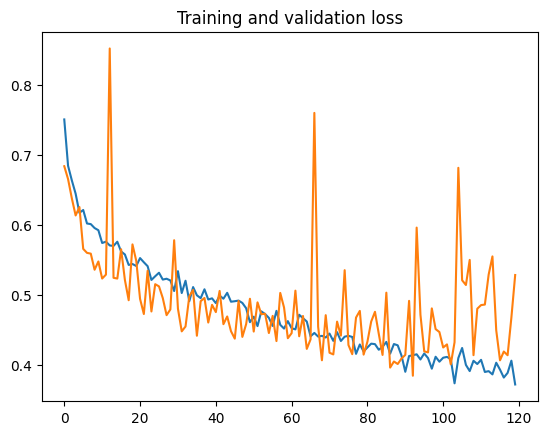

In [14]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

<function matplotlib.pyplot.show(close=None, block=None)>

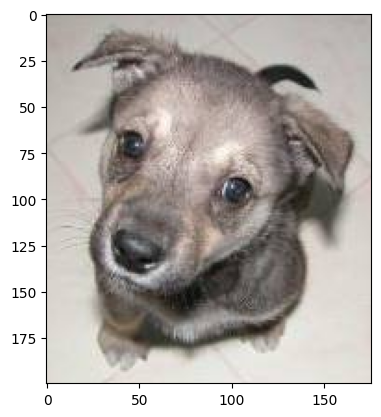

In [76]:
#imagen a predecir
plt.imshow(mpimg.imread('./test1/88.jpg'))
plt.show

In [77]:
#predecir una imagen
img = load_img('./test1/88.jpg', target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("Es un perro")
else:
    print("Es un gato")

1/1 [==============================] - 0s 40ms/step
[1.]
Es un perro


<function matplotlib.pyplot.show(close=None, block=None)>

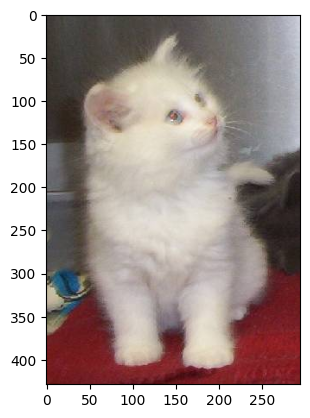

In [74]:
#imagen a predecir
plt.imshow(mpimg.imread('./test1/84.jpg'))
plt.show

In [75]:
#predecir una imagen
img = load_img('./test1/84.jpg', target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("Es un perro")
else:
    print("Es un gato")

1/1 [==============================] - 0s 356ms/step
[0.]
Es un gato


<function matplotlib.pyplot.show(close=None, block=None)>

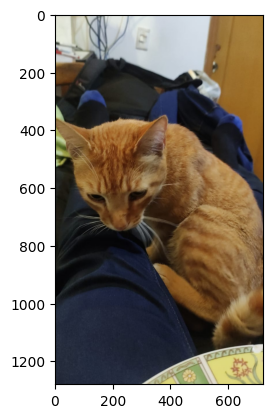

In [78]:
#imagen a predecir
plt.imshow(mpimg.imread('missi1.jpeg'))
plt.show

In [79]:
#predecir una imagen
img = load_img('missi1.jpeg', target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("Es un perro")
else:
    print("Es un gato")

1/1 [==============================] - 0s 44ms/step
[1.]
Es un perro
